In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/2024fall/BME574/Homework`


In [2]:
Pkg.add(["Random","LinearAlgebra","FFTW","Plots"])

   Resolving package versions...
  No Changes to `~/2024fall/BME574/Homework/Project.toml`
  No Changes to `~/2024fall/BME574/Homework/Manifest.toml`
Precompiling project...
  ✓ Xorg_libXau_jll
  ✓ Xorg_xtrans_jll
  ✓ Xorg_libXdmcp_jll
  ✓ oneTBB_jll
  ✓ OpenSSL_jll
  ✓ Libmount_jll
  ✓ EpollShim_jll
  ✓ Libgpg_error_jll
  ✓ Wayland_protocols_jll
  ✓ LZO_jll
  ✓ Xorg_libpthread_stubs_jll
  ✓ Dbus_jll
  ✓ FFTW_jll
  ✓ MKL_jll
  ✓ Wayland_jll
  ✓ Libgcrypt_jll
  ✓ OpenSSL
  ✓ XSLT_jll
  ✓ Xorg_libX11_jll
  ✓ Xorg_xcb_util_jll
  ✓ Xorg_libxkbfile_jll
  ✓ Xorg_libXfixes_jll
  ✓ FFMPEG_jll
  ✓ Xorg_libXinerama_jll
  ✓ Xorg_libXrandr_jll
  ✓ Xorg_xkbcomp_jll
  ✓ Xorg_libXcursor_jll
  ✓ Xorg_libXi_jll
  ✓ FFMPEG
  ✓ Xorg_xkeyboard_config_jll
  ✓ HTTP
  ✓ libdecor_jll
  ✓ Qt6Base_jll
  ✓ Qt6ShaderTools_jll
  ✓ GR_jll
  ✓ FFTW
  ✓ Qt6Declarative_jll
  ✓ GR
  ✓ Plots
  ✓ Plots → UnitfulExt
  40 dependencies successfully precompiled in 28 seconds. 122 already precompiled.


In [3]:
using FFTW, Random, Plots

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


In [4]:
dt = 0.001;
t = 0:dt:1;
n = length(t)
# generate the clear signal as the sum of 2 frequencies
f = sin.(2π*50*t) .+ sin.(2π*120*t);
# add noise to the signal
f_noise = f .+ 2.5*randn(n);
# compute the fast Fourier transform
fhat = fft(f_noise);

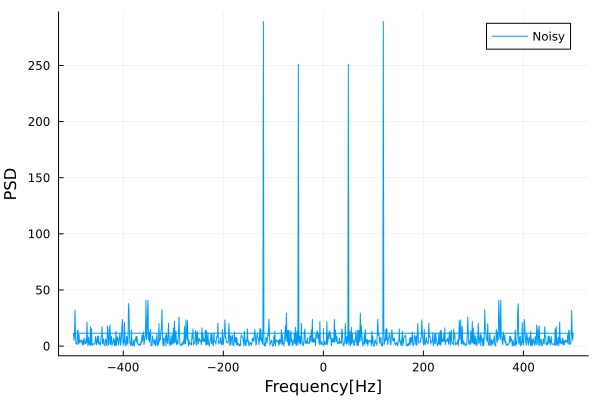

In [5]:
# Power spectrum (power per freq)
PSD = abs2.(fhat) ./n;
freq = fftfreq(n, 1/dt); # Julia has this function to create frequency axis
# take a look at the PSD to determine the power cutoff for filterring
p_PSD = plot(freq, PSD, xlabel = "Frequency[Hz]", ylabel = "PSD", label = "Noisy");
p_PSD

In [6]:
ind = PSD .> 100;
# clean the PSD and filter the signal with ind
PSD_clean = PSD .* ind;
fhat_clean = fhat .* ind;

# FFT transforms our signal from time domain to frequency domain
# after filtering in frequency domain, we need to transorm the filtered result back to the time domain with function ifft
ffilt = real(ifft(fhat_clean));

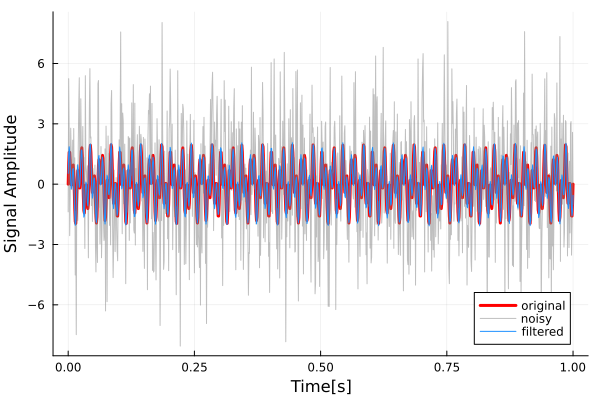

In [7]:
# plot the generated original signal (f), noisy signal (f_noise) and the fft filtered signal (ffilt)
p_freqs = plot(t, f, xlabel = "Time[s]", ylabel = "Signal Amplitude", label = "original", color=:red, linewidth=3, alpha=1);
plot!(p_freqs, t, f_noise, label = "noisy", color=:grey, linewidth=1, alpha=0.5);
plot!(p_freqs, t, ffilt, label = "filtered", color=:dodgerblue, linewidth=1, alpha=1);
p_freqs

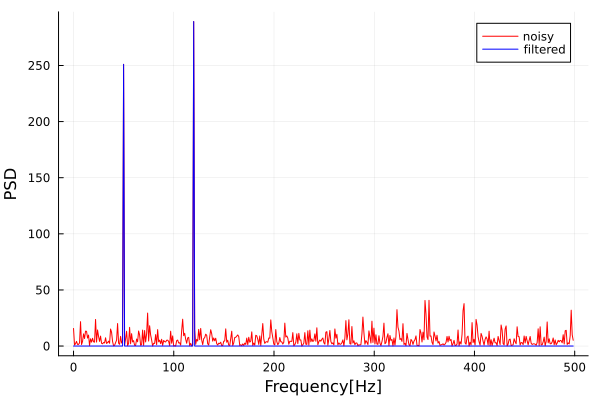

In [8]:
# plot the PSD and cleaned PSD in frequency domain
# plot half of it since it is symmetrical
L = 1:floor(Int, n/2);
p_PSD = plot(freq[L], PSD[L], xlabel = "Frequency[Hz]", ylabel = "PSD", label = "noisy", color=:red);
plot!(p_PSD, freq[L], PSD_clean[L], label = "filtered", color=:blue)
p_PSD